In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [ ]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("riau.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

In [ ]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

In [ ]:
# cek duplikat
df1.duplicated().sum()

In [ ]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

In [ ]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

In [ ]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

In [ ]:
#cek null
df1.isnull().sum()

In [ ]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

In [ ]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

In [ ]:
#plotting tavg
df1[['Tavg']].plot()

In [ ]:
#plotting tavg
df1[['RR']].plot()

In [ ]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

In [ ]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

In [ ]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

In [ ]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

In [ ]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [ ]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [ ]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
X_test

In [ ]:
#testing
pred1 = lr.predict(X_test)
pred1

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

In [ ]:
X_test['Indeks'] = X_test.index
X_test

In [ ]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

In [318]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-318-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,25.7,NaN
1,27.3,NaN
2,24.9,NaN
3,26.4,NaN
4,27.2,NaN
...,...,...
344,27.9,27.875049
345,25.8,27.188081
346,27.8,27.846836
347,27.1,27.619382


<Axes: >

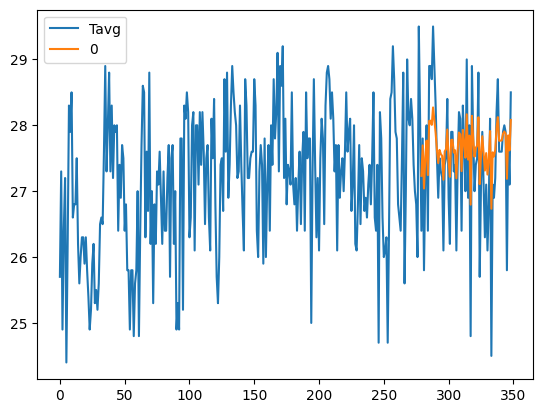

In [319]:
kan.plot()

In [320]:
new_data = [[350, 28.5],[351,28.5],[352,28.5],[353,28.5],[354,28.5],[355,28.5],[356,28.5]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.08581078, 28.08811516, 28.09041955, 28.09272393, 28.09502831,
       28.0973327 , 28.09963708])

In [321]:
kan.to_json('prediksi riau')